In [73]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


In [74]:
audioFile = "../data/mario-marble-music.mp3"
y, sr = librosa.load(
    path=audioFile,
    mono=True,
    # duration=3
)
duration = len(y)/sr
time = np.linspace(0, duration, len(y))
y.shape


(1322241,)

In [75]:
y_freq = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(y_freq), ref=np.max)
print(f"y_freq Shape {y_freq.shape}")
print(f"S_db Shape {S_db.shape}") # 1025 Freq Bins and 130 Time Bins


y_freq Shape (1025, 2583)
S_db Shape (1025, 2583)


In [76]:
freq_time = np.linspace(0,duration,y_freq.shape[1])
max_freqs = np.max(np.abs(y_freq),axis=0)
max_freqs_db = np.max((S_db),axis=0)

In [77]:
def get_filtered_times(dt,onset_times,max_freqs,nbd=2):
    filtered=[]
    for ot in onset_times:
        idx=int(ot/freq_time[1])
        idx_min = idx-nbd if idx>nbd else 0 
        idx_max = idx+nbd if idx+nbd<=len(max_freqs) else len(max_freqs)
        freq = np.max(max_freqs[idx_min:idx_max])
        if freq>20:
            filtered.append(ot)
    return filtered



In [78]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_times = librosa.onset.onset_detect(
    onset_envelope=onset_env, 
    sr=sr,
    units="time")
onset_times_filtered = get_filtered_times(freq_time[1],onset_times,max_freqs)

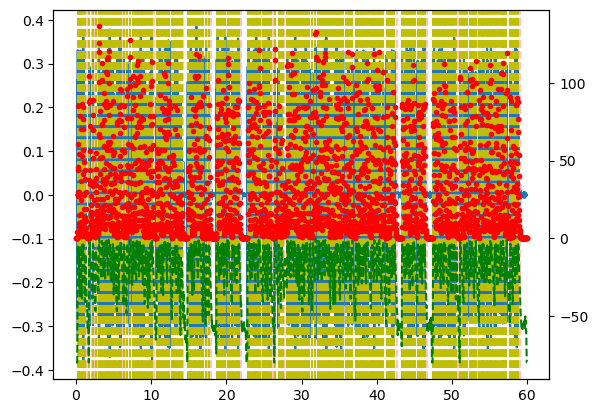

In [79]:
fig, [[ax]] = plt.subplots(1, 1, squeeze=False)
ax.plot(time,y)
ax2=ax.twinx()

ax2.plot(freq_time,max_freqs,"r.")
ax2.plot(freq_time,max_freqs_db,"g--")
for time in onset_times:
    ax.axvline(time,color="pink",linestyle="--")
for time in onset_times_filtered:
    ax.axvline(time,color="y",linestyle="--")

In [83]:
np.savetxt("../data/mario-marble-music.txt",np.array(onset_times_filtered)*1000)